In [7]:
import numpy as np
import math

file = open("./train3.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,4))
X = csvFile[:,1]
Y = csvFile[:,2]
A[:,0] = pow(csvFile[:,1],3)
A[:,1] = pow(csvFile[:,1],2)
A[:,2] = csvFile[:,1]

B = np.ones((4,1))
Q, R = np.linalg.qr(A, mode='complete')
solveY = np.dot(Q.T,Y)[:4]
vals = []
for arr in R:
    temp = []
    for val in arr:
        if val != 0:
            temp.append(val)
    vals = temp + vals

add = 0
for i in range(1,5):
    if(i==1):
        add = i
        B[4-i] = solveY[4-i]/vals[0]
    else:
        stuff = 0
        place = 3
        for j in range(add+i-1, add, -1):
            stuff+=B[place]*vals[j]
            place-=1
        B[4-i] = (solveY[4-i] - stuff)/vals[add]
        add = add + i

print("X^3:",B[0,0])
print("X^2:",B[1,0])
print("X:",B[2,0])

X^3: 28.596979009635053
X^2: -42.96251202866324
X: 15.658499376854271


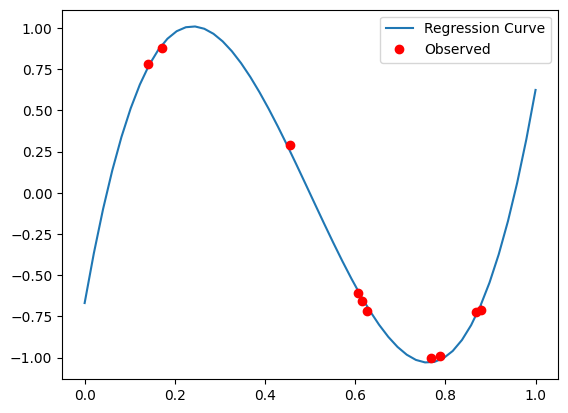

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
l=0
x = np.linspace(0, 1, 50)
y = [B[3,0] + B[2,0]*xT + B[1,0]*pow(xT,2) + B[0,0]*pow(xT,3) for xT in x]
plt.plot(x,y, color='C0', label='Regression Curve')
for i in range(n):
    val = B[3,0] + B[2,0]*X[i] + B[1,0]*pow(X[i],2) + B[0,0]*pow(X[i],3)
    plt.vlines(x=X[i], ymin=val,ymax=Y[i],linestyles='dotted')
    if l==0:
        l+=1
        plt.plot(X[i], Y[i], 'ro', label='Observed')
    else:
        plt.plot(X[i], Y[i], 'ro')
ax.legend()
ax.axis('auto')
plt.show()

-608695.6300934565


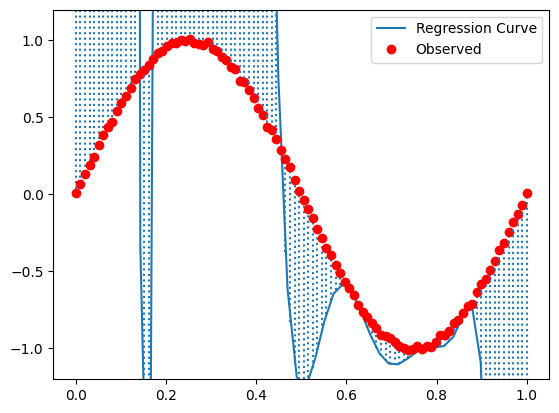

In [13]:
import numpy as np
import math

file = open("./train3.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,10))
X = csvFile[:,1]
Y = csvFile[:,2]
A[:,0] = pow(csvFile[:,1],9)
A[:,1] = pow(csvFile[:,1],8)
A[:,2] = pow(csvFile[:,1],7)
A[:,3] = pow(csvFile[:,1],6)
A[:,4] = pow(csvFile[:,1],5)
A[:,5] = pow(csvFile[:,1],4)
A[:,6] = pow(csvFile[:,1],3)
A[:,7] = pow(csvFile[:,1],2)
A[:,8] = csvFile[:,1]


B = np.ones((10,1))
Q, R = np.linalg.qr(A, mode='complete')
solveY = np.dot(Q.T,Y)[:10]
vals = []
for arr in R:
    temp = []
    for val in arr:
        if val != 0:
            temp.append(val)
    vals = temp + vals

    
add = 0
for i in range(1,11):
    if(i==1):
        add = i
        B[10-i] = solveY[10-i]/vals[0]
    else:
        stuff = 0
        place = 9
        for j in range(add+i-1, add, -1):
            stuff+=B[place]*vals[j]
            place-=1
        B[10-i] = (solveY[10-i] - stuff)/vals[add]
        add = add + i
        
file = open("./test3.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,1))
X = csvFile[:,1]
Y = csvFile[:,2]

RSS = sum([pow((B[9,0] + B[8,0]*X[i] + B[7,0]*pow(X[i],2) + B[6,0]*pow(X[i],3) + B[5,0]*pow(X[i],4) + B[4,0]*pow(X[i],5) + B[3,0]*pow(X[i],6) + B[2,0]*pow(X[i],7) + B[1,0]*pow(X[i],8) + B[0,0]*pow(X[i],9))-Y[i],2) for i in range(n)])
yAvg = sum(Y)/n
TSS = sum([pow(Y[i]-yAvg,2) for i in range(n)])
print(1-(RSS/TSS))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
l=0
x = np.linspace(0, 1, 50)
y = [B[9,0] + B[8,0]*xT + B[7,0]*pow(xT,2) + B[6,0]*pow(xT,3) + B[5,0]*pow(xT,4) + B[4,0]*pow(xT,5) + B[3,0]*pow(xT,6) + B[2,0]*pow(xT,7) + B[1,0]*pow(xT,8) + B[0,0]*pow(xT,9) for xT in x]
plt.plot(x,y, color='C0', label='Regression Curve')
for i in range(n):
    val = B[9,0] + B[8,0]*X[i] + B[7,0]*pow(X[i],2) + B[6,0]*pow(X[i],3) + B[5,0]*pow(X[i],4) + B[4,0]*pow(X[i],5) + B[3,0]*pow(X[i],6) + B[2,0]*pow(X[i],7) + B[1,0]*pow(X[i],8) + B[0,0]*pow(X[i],9)
    plt.vlines(x=X[i], ymin=val,ymax=Y[i],linestyles='dotted')
    if l==0:
        l+=1
        plt.plot(X[i], Y[i], 'ro', label='Observed')
    else:
        plt.plot(X[i], Y[i], 'ro')
plt.ylim(-1.2,1.2)
ax.legend()
plt.show()

-0.2453283251902434


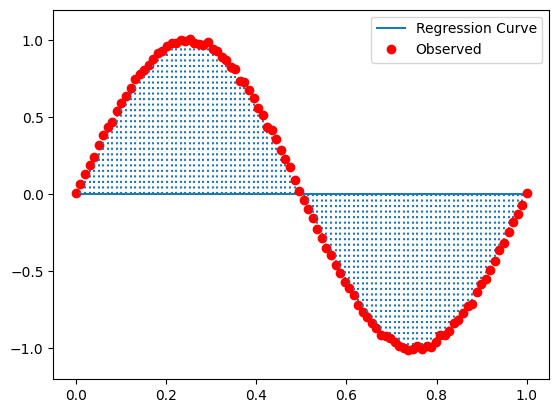

In [14]:
import numpy as np
import math

file = open("./train3.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,1))
X = csvFile[:,1]
Y = csvFile[:,2]

yAvg = sum(Y)/n

file = open("./test3.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,1))
X = csvFile[:,1]
Y = csvFile[:,2]

import matplotlib.pyplot as plt

RSS = sum([pow(yAvg-Y[i],2) for i in range(n)])
yAvg = sum(Y)/n
TSS = sum([pow(Y[i]-yAvg,2) for i in range(n)])
print(1-(RSS/TSS))

fig, ax = plt.subplots()
l=0
x = np.linspace(0, 1, 50)
y = [yAvg for xT in x]
plt.plot(x,y, color='C0', label='Regression Curve')
for i in range(n):
    val = yAvg
    plt.vlines(x=X[i], ymin=val,ymax=Y[i],linestyles='dotted')
    if l==0:
        l+=1
        plt.plot(X[i], Y[i], 'ro', label='Observed')
    else:
        plt.plot(X[i], Y[i], 'ro')
plt.ylim(-1.2,1.2)
ax.legend()
plt.show()